In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

### Load Data

In [2]:
data = pd.read_csv("credit_card_clustering.csv")


In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

 Exploratory Data Profiling/Analysis

In [5]:
#report = pp.ProfileReport(data)

In [6]:
#report.to_file('CreditcardData.html')

### How many rows/columns are there?

In [7]:
data.shape

(8950, 18)

### How many customers are there?

In [8]:
data['CUST_ID'].nunique()


8950

This means, we have 8950 unique customer IDs

### How does the payment distribution of our customers look like?

Descriptive Statistics

In [9]:
data['PAYMENTS'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      1733.143852
std       2895.063757
min          0.000000
10%        179.617069
20%        313.141031
30%        459.438287
40%        624.268198
50%        856.901546
60%       1185.259270
70%       1604.092113
80%       2314.017654
90%       3923.906642
max      50721.483360
Name: PAYMENTS, dtype: float64

The annual income ranges from 0 to 19043 with an average (median) balance is 873.

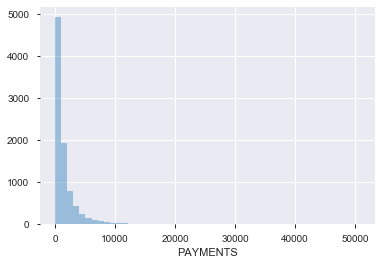

In [10]:
sns.distplot(data['PAYMENTS'], kde=False)

### How does the purchases distribution look like?

In [11]:
data['PURCHASES'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      1003.204834
std       2136.634782
min          0.000000
10%          0.000000
20%          0.000000
30%         89.285000
40%        212.850000
50%        361.280000
60%        557.546000
70%        894.316000
80%       1422.438000
90%       2542.624000
max      49039.570000
Name: PURCHASES, dtype: float64

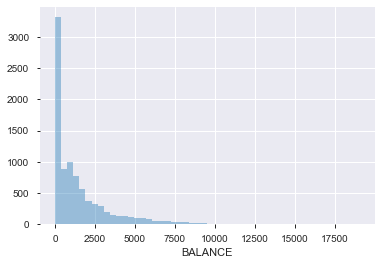

In [12]:
sns.distplot(data['BALANCE'], kde=False)

### How does the balances distribution look like?

In [13]:
data['BALANCE'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      1564.474828
std       2081.531879
min          0.000000
10%         23.575529
20%         77.238026
30%        207.176552
40%        467.021989
50%        873.385231
60%       1207.815587
70%       1698.588855
80%       2571.434263
90%       4338.563657
max      19043.138560
Name: BALANCE, dtype: float64

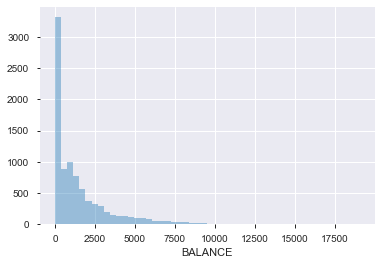

In [14]:
sns.distplot(data['BALANCE'], kde=False)

### How does the CREDIT distribution look like?

In [15]:
data['CREDIT_LIMIT'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      4494.282473
std       3638.646702
min         50.000000
10%       1200.000000
20%       1500.000000
30%       2000.000000
40%       2500.000000
50%       3000.000000
60%       4200.000000
70%       6000.000000
80%       7000.000000
90%       9500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

In [16]:
data['CREDIT_LIMIT'].fillna(3000,inplace=True) #Missing value insert median value

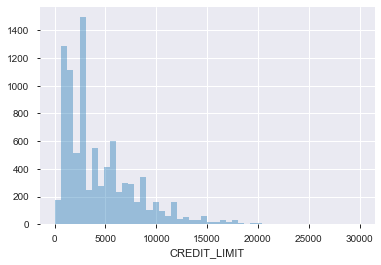

In [17]:
sns.distplot(data['CREDIT_LIMIT'], kde=False)

# Clustering

In [18]:
from sklearn.cluster import KMeans

In [19]:
# Get features we need
features = ['CREDIT_LIMIT', 'PURCHASES','PAYMENTS','BALANCE']
X = data[features]

# Convert categorical to numeric
# X = pd.get_dummies(X_raw)
# X_raw.head()

X.head()

,CREDIT_LIMIT,PURCHASES,PAYMENTS,BALANCE
0,1000.0,95.40,201.802084,40.900749
1,7000.0,0.00,4103.032597,3202.467416
2,7500.0,773.17,622.066742,2495.148862
3,7500.0,1499.00,0.000000,1666.670542
4,1200.0,16.00,678.334763,817.714335


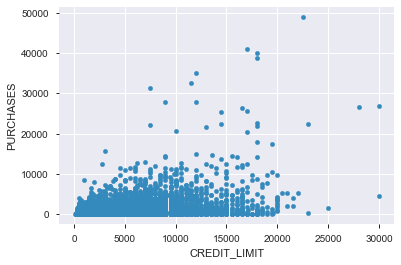

In [20]:
# If you have 2 features, you can plot it on a 2D scatter plot
X.plot.scatter('CREDIT_LIMIT', 'PURCHASES')

### Choosing Optimal *k*

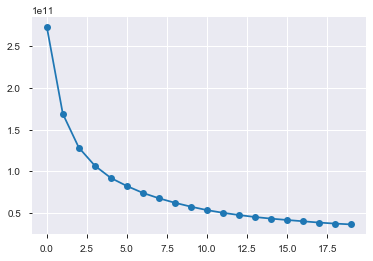

In [21]:
# get the sum of squared errors and find where the reduction of the errors are saturated with the increase of k
squared_errors = []

for num_iter in range(1,21):
  km = KMeans(n_clusters=num_iter, random_state=42)
  km.fit(X)
  squared_errors.append(km.inertia_)

# check for the best k to use
plt.plot(squared_errors, marker = 'o')

Using the elbow method, I decided to use *k=6*.

In [22]:
# Clustering using KMeans. We choose 5 clusters
km = KMeans(n_clusters=6, random_state=42)

# Fit data to model
km.fit(X)

# Get labels
labels = km.predict(X)

# Create new dataframe with features and labels
new_data = X.copy()

# Add labels to new_data dataframe
new_data['labels'] = labels

In [23]:
new_data.head()

,CREDIT_LIMIT,PURCHASES,PAYMENTS,BALANCE,labels
0,1000.0,95.40,201.802084,40.900749,2
1,7000.0,0.00,4103.032597,3202.467416,1
2,7500.0,773.17,622.066742,2495.148862,1
3,7500.0,1499.00,0.000000,1666.670542,1
4,1200.0,16.00,678.334763,817.714335,2


### Plot Centers and labels

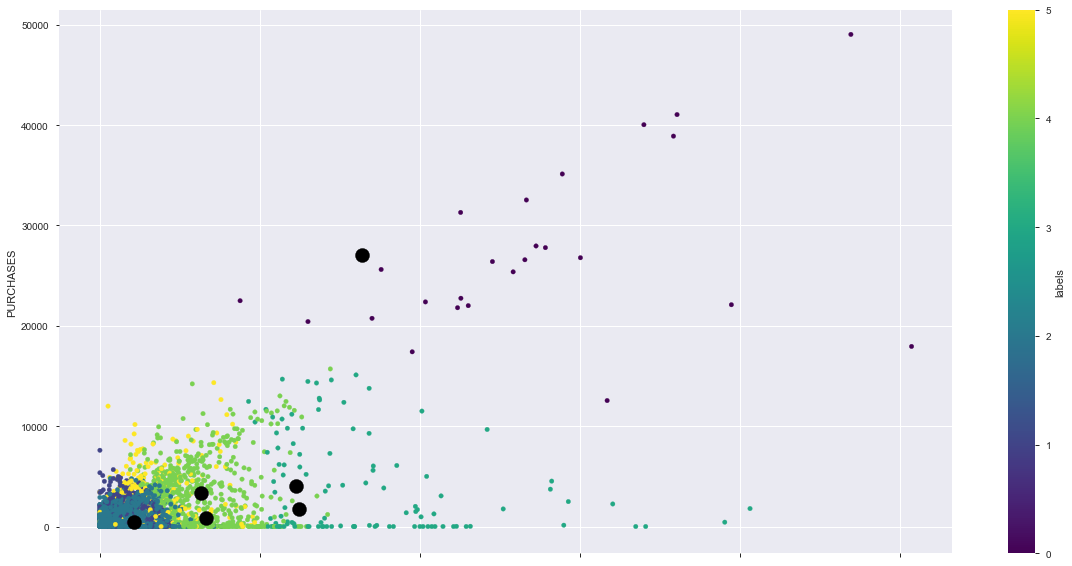

In [24]:
# Plot data points and colorize based on label
new_data.plot.scatter(x='PAYMENTS', 
                      y='PURCHASES', 
                      c='labels', 
                      cmap='viridis',
                      figsize=(20, 10))

# Get cluster centers
centers = km.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], s=200, color='black')

# Deep Dive to each cluster

In [25]:
# Cluster 0
cluster_0 = new_data[new_data['labels']==0]
cluster_0.describe()

,CREDIT_LIMIT,PURCHASES,PAYMENTS,BALANCE,labels
count,25.000000,25.000000,25.000000,25.000000,25.0
mean,16360.000000,27085.309200,27159.043527,5351.546106,0.0
std,5626.425745,8459.048271,9708.374234,4235.586482,0.0
min,7500.000000,12551.950000,8760.860264,1268.809031,0.0
25%,12000.000000,22009.920000,22350.292470,2774.249582,0.0
50%,17000.000000,25615.070000,26557.097240,3454.094319,0.0
75%,18000.000000,31299.350000,31698.419020,6372.182817,0.0
max,30000.000000,49039.570000,50721.483360,19043.138560,0.0


Cluster 0: 

In [26]:
# Cluster 1 
cluster_1 = new_data[new_data['labels']==1]
cluster_1.describe()

,CREDIT_LIMIT,PURCHASES,PAYMENTS,BALANCE,labels
count,2235.000000,2235.000000,2235.000000,2235.000000,2235.0
mean,6618.271304,868.307195,1261.146427,1889.702293,1.0
std,1638.906274,979.867195,908.088123,1865.258650,0.0
min,3800.000000,0.000000,0.000000,0.000000,1.0
25%,5000.000000,69.400000,594.837364,156.618626,1.0
50%,6500.000000,502.630000,1064.575065,1384.431318,1.0
75%,7500.000000,1330.625000,1708.183045,3304.626338,1.0
max,12000.000000,7597.090000,4613.453210,7295.920263,1.0


Cluster 1: 

In [27]:
# Cluster 2
cluster_2 = new_data[new_data['labels']==2]
cluster_2.describe()

,CREDIT_LIMIT,PURCHASES,PAYMENTS,BALANCE,labels
count,5253.000000,5253.000000,5253.000000,5253.000000,5253.0
mean,2116.147069,494.243092,862.937606,779.637208,2.0
std,1003.167510,662.419273,892.406693,786.207448,0.0
min,50.000000,0.000000,0.000000,0.000000,2.0
25%,1200.000000,13.000000,281.884143,72.188087,2.0
50%,2000.000000,249.960000,547.239240,545.767741,2.0
75%,3000.000000,664.510000,1127.028432,1256.819270,2.0
max,4700.000000,4793.350000,7570.207782,3676.070324,2.0


Cluster 2: 

In [28]:
# Cluster 3
cluster_3 = new_data[new_data['labels']==3]
cluster_3.describe()

,CREDIT_LIMIT,PURCHASES,PAYMENTS,BALANCE,labels
count,106.000000,106.000000,106.000000,106.000000,106.0
mean,12275.943396,4016.447830,16604.339677,5294.640556,3.0
std,3749.083895,4762.884234,6330.296383,3833.979575,0.0
min,2500.000000,0.000000,9290.702248,4.382924,3.0
25%,10000.000000,0.000000,11718.447388,1913.878565,3.0
50%,12000.000000,1717.925000,14418.011730,4932.574016,3.0
75%,15000.000000,7261.115000,19816.130032,7875.778809,3.0
max,21000.000000,15108.470000,40627.595240,15244.748650,3.0


Cluster 3:

In [29]:
# Cluster 4
cluster_4 = new_data[new_data['labels']==4]
cluster_4.describe()

,CREDIT_LIMIT,PURCHASES,PAYMENTS,BALANCE,labels
count,640.000000,640.000000,640.000000,640.000000,640.0
mean,6290.736269,3375.437391,6117.339187,2066.887493,4.0
std,2293.265514,2969.531530,2227.399470,1690.493949,0.0
min,1000.000000,0.000000,1897.437629,0.000000,4.0
25%,4500.000000,476.090000,4418.922413,606.541548,4.0
50%,6000.000000,3280.000000,5692.881675,1650.501147,4.0
75%,8000.000000,5070.042500,7389.546002,3143.836758,4.0
max,12500.000000,15704.040000,14399.703180,8315.894044,4.0


Cluster 4: 

In [30]:
# Cluster 5
cluster_5 = new_data[new_data['labels']==5]
cluster_5.describe()

,CREDIT_LIMIT,PURCHASES,PAYMENTS,BALANCE,labels
count,691.000000,691.000000,691.000000,691.000000,691.0
mean,12416.136035,1705.646295,2613.358602,5304.344838,5.0
std,3055.260985,2205.779249,1874.115849,3575.916222,0.0
min,7000.000000,0.000000,0.000000,0.488050,5.0
25%,10000.000000,106.580000,1367.213781,2257.845949,5.0
50%,12000.000000,878.110000,2034.824228,5693.979714,5.0
75%,14000.000000,2468.160000,3266.544588,7657.790939,5.0
max,30000.000000,14332.920000,9874.465723,18495.558550,5.0


Cluster 5: 